# 1. 데이터 불러오기

In [9]:
## 필요한 패키지를 불러옵니다.
import os
import pandas as pd
import numpy as np

In [10]:
## 경로설정을 해줍니다.
os.chdir(r'C:\Users\PC\Documents\강의최종본\data\앙상블')
## 위의 경로설정은 제 컴퓨터를 기준으로 입력한 것으로 각자 데이터를 저장한 위치에 맞게 바꿔주시기 바랍니다.

data = pd.read_csv("bank-additional-full.csv", sep = ";")
## 위의 실습 데이터는 러닝스푼즈 홈페이지에서도 다운받으실 수 있습니다.

In [11]:
## 카테고리형 변수를 수치화시키는 one hot encoding이란 방법론을 pd.get_dummies란 함수를 통해 실행시킵니다.
data = pd.get_dummies(data, columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])

In [13]:
## 목표 변수를 yes는 1, no는 0으로 수치화시킵니다(shap value 패키지 특성상 이렇게 목표변수를 수치화시키지 않는다면 나중에 에러가 뜹니다).
data['y'] = np.where( data['y'] == 'no', 0, 1)

In [15]:
## 학습에 활용할 input 변수를 지정합니다.
input_var = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']

# 2. Xgboost 학습시키기

In [16]:
## xgboost를 위한 패키지를 임포트합니다.
from xgboost import XGBRegressor

xgb = XGBRegressor( n_estimators = 300, learning_rate=0.1 )

In [17]:
## xgboost 모델을 train 데이터에서 학습시킵니다.
xgb.fit(data[input_var], data['y'])

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

# 3. Shap Value 활용하기

### a) 변수중요도

In [19]:
## shap value를 위한 패키지를 임포트합니다.
import shap

In [20]:
## 제작한 모델을 TreeExplainer 함수에 넣고, 학습한 train 데이터를 shap_values 함수에 넣습니다.
## 이렇게 하면 우리가 원하는 변수중요도가 추출되어 나오게 됩니다.
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values( data[input_var] )

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


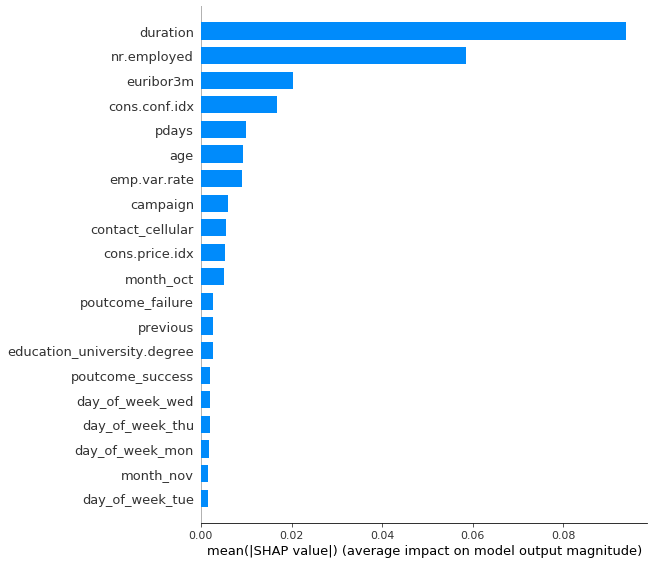

In [22]:
## 계산된 변수중요도를 summary_plot을 통해 시각화합니다.
shap.summary_plot( shap_values , data[input_var] , plot_type="bar" )

### b) dependence plot

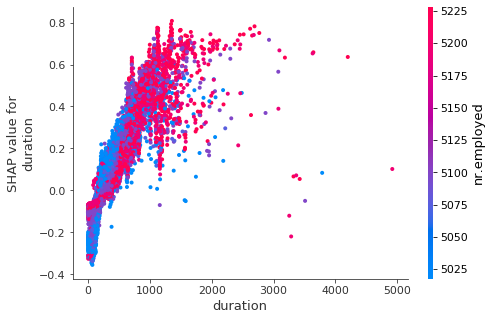

In [23]:
## dependence_plot 함수는 특정 input 변수와 target 변수와의 관계를 표현하는 dependence plot을 그려주는 함수입니다.
## 해당 그래프를 어떻게 해석하는지가 매우 중요하니 실습을 잘 따라해주세요. 추후에 포트폴리오 강의에서도 해당 plot을 다룰 예정입니다.
shap.dependence_plot( 'duration' , shap_values , data[input_var] )

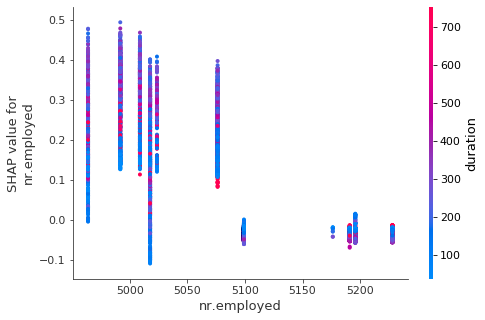

In [25]:
shap.dependence_plot( 'nr.employed' , shap_values , data[input_var] )

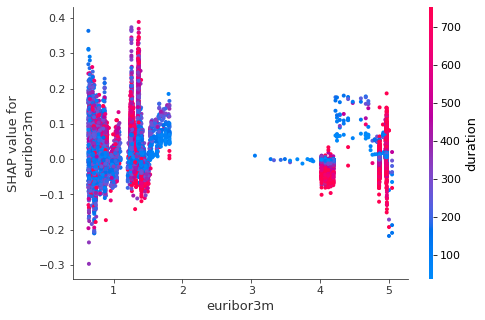

In [26]:
shap.dependence_plot( 'euribor3m' , shap_values , data[input_var] )

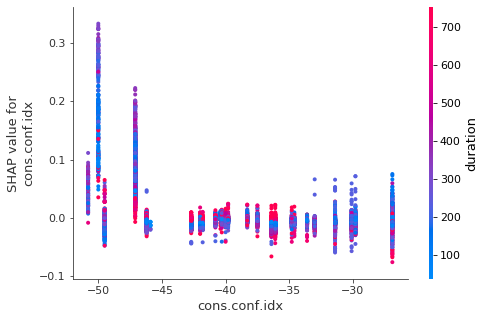

In [27]:
shap.dependence_plot( 'cons.conf.idx' , shap_values , data[input_var] )

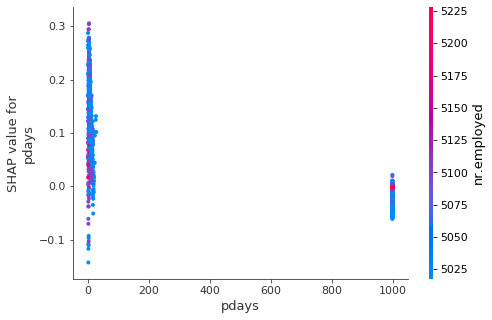

In [28]:
shap.dependence_plot( 'pdays' , shap_values , data[input_var] )

### c) force plot

In [30]:
prediction = xgb.predict(data[input_var])
data['pred'] = prediction

In [36]:
## force_plot 함수는 특정 값이 어떻게 예측되었는지를 시각화하는 force plot을 그려주는 함수입니다.
shap.initjs()
shap.force_plot( explainer.expected_value , shap_values[41187] , data[input_var].iloc[41187] )